# 1. domácí úkol
## Načtení dat + výpočet výskytu slov

In [1]:
import typing
import collections
from scipy import stats
import numpy as np

f1 = open("../001.txt", "r")
f7 = open("../007.txt", "r")

def lenOccurences(X: list):
    return collections.OrderedDict(sorted(collections.Counter(X).items()))

def wordLen(f: typing.TextIO):
    occurrences = []
    lines = f.readlines()
    for line in lines[1:]:    # skip first line
        occurrences = occurrences + list(map(len, line.split(" ")))
    return np.array(occurrences).flatten()

X1 = wordLen(f1)
X7 = wordLen(f7)

occurrences1 = lenOccurences(X1)
occurrences7 = lenOccurences(X7)
print("Výskyty délek v textu7")
occurrences7

Výskyty délek v textu7


OrderedDict([(1, 33),
             (2, 177),
             (3, 316),
             (4, 156),
             (5, 141),
             (6, 91),
             (7, 76),
             (8, 54),
             (9, 33),
             (10, 9),
             (11, 5),
             (12, 4),
             (13, 2),
             (14, 1),
             (15, 2)])

## Odhad pravděpodobnosti jednotlivých délek slov
Odhad střední hodnoty pomocí výběrového průměru.
Odhad rozptylu pomocí výberového rozptylu.

In [2]:
μ1 = np.mean(X1)
μ7 =  np.mean(X7)

sX1_2 = np.var(X1, ddof=1)
sX7_2 = np.var(X7, ddof=1)
sX1 = np.std(X1, ddof=1)
sX7 = np.std(X7, ddof=1)

print("Text 1:")
print(f"  μ={μ1}")
print(f"  sn2={sX7_2}")
print("Text 9:")
print(f"  μ={μ7}")
print(f"  sn2={sX7_2}")

Text 1:
  μ=4.3825
  sn2=4.937748366283397
Text 9:
  μ=4.303636363636364
  sn2=4.937748366283397


In [3]:
from matplotlib import pyplot as plt

def toArray(any):
    return np.array(list(any))

def probabilities(X: list):
    occurrences = lenOccurences(X)
    return occurrences.keys(), toArray(occurrences.values()) / sum(occurrences.values())

## Vizualizace délek textu

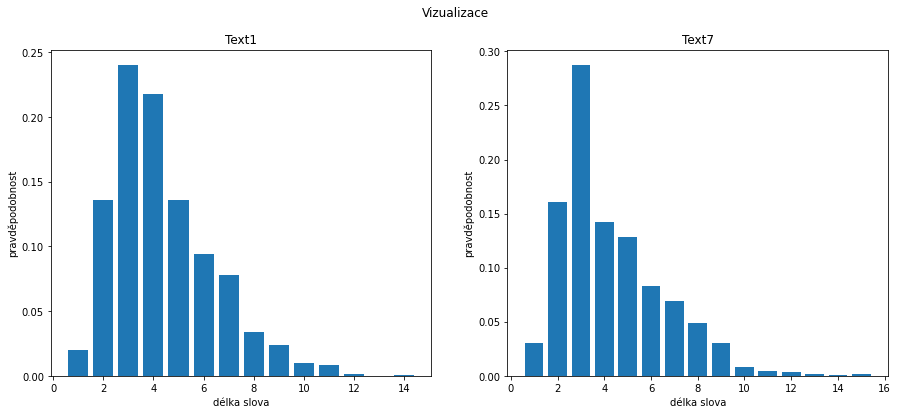

In [5]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 6))
fig.suptitle("Vizualizace")
# Generates a probability plot of sample data against the quantiles of a specified theoretical distribution 
# (the normal distribution by default)
lens, prob = probabilities(X1)
ax1.bar(lens, prob);
ax1.set_xlabel("délka slova")
ax1.set_ylabel("pravděpodobnost")
ax1.set_title("Text1")

lens, prob = probabilities(X7)
ax2.bar(lens, prob);
ax2.set_xlabel("délka slova")
ax2.set_ylabel("pravděpodobnost")
ax2.set_title("Text7");

## Odhad pravděpodobnosti znaků (bez mezery)

In [6]:

f1 = open("../001.txt", "r")
f7 = open("../007.txt", "r")

def chars(f: typing.TextIO):
    values = []
    lines = f.readlines()
    for line in lines[1:]:    # skip first line
        values = values + list(line)
    values = [x for x in values if x != " "]    # ignore spacce
    return values
    
char_X1 = chars(f1)
char_X7 = chars(f7)
char_occurrences1 = lenOccurences(char_X1)
char_occurrences7 = lenOccurences(char_X7)


## Vizualizace pravděpodobnosti znaků (bez mezery)

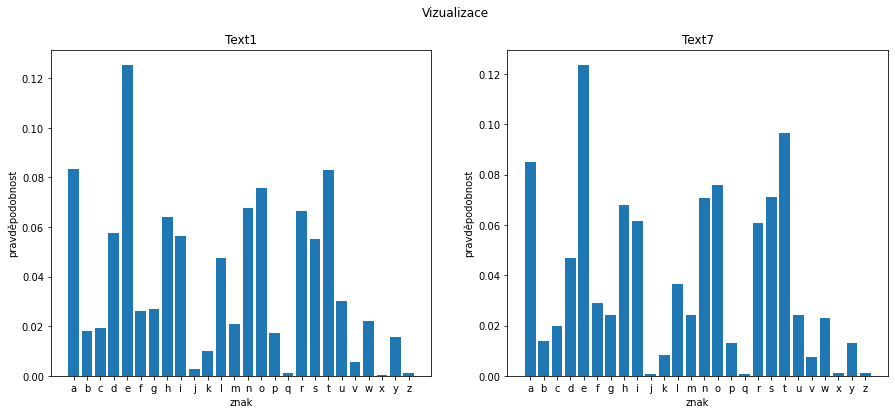

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 6))
fig.suptitle("Vizualizace")
# Generates a probability plot of sample data against the quantiles of a specified theoretical distribution 
# (the normal distribution by default)
lens, prob = probabilities(char_X1)
ax1.bar(lens, prob)
ax1.set_xlabel("znak")
ax1.set_ylabel("pravděpodobnost")
ax1.set_title("Text1")

lens, prob = probabilities(char_X7)
ax2.bar(lens, prob)
ax2.set_xlabel("znak")
ax2.set_ylabel("pravděpodobnost")
ax2.set_title("Text7");

# Test nezávislost rozdělení délky slov na textu
Na hladině významnosti 5% otestujte hypotézu, že rozdělení délek slov nezávisí na tom, o který jde text. Určete také p-hodnotu testu.

In [9]:
α = 0.05

$H_0:$ rozdělení délek slov nezávisí na tom, o který jde text vs. $H_A:$ rozdělení slov závisí na tom, o který text jde

Test provedu pomocí testu nezávislosti v kontingenční tabulce

In [13]:
def values(occ: dict):
    return list(occ.values())

def fill_zero_occurencies(occ1: dict, occ2: dict):
    for k in occ2.keys():
        occ1[k] = occ1.get(k, 0)
# first text is missing words with len 13 and 15 -> fill zero
fill_zero_occurencies(occurrences1, occurrences7)

contingancy_table = np.array([values(occurrences1), values(occurrences7)])
print("Kontingenční tabulka")
print(contingancy_table)

n = np.sum(contingancy_table)

## Marginální pravděpodobnosti
px=np.sum(contingancy_table, axis=1)/n
py=np.sum(contingancy_table, axis=0)/n
print()
print("px\n", px)
print("py\n", py)

## Očekávané £etnosti
n_p = (px[:, None] @ py[:, None].T) * n
print()
print("očekávané četnosti")
print(n_p)

## Testová statistika
Xstat= np.sum((contingancy_table-n_p)**2/n_p)
print("Testová statistika", Xstat)

# Abychom mohli použít χ2 test nezávislosti, v každém políčku bychom měli mít alespoň 5 očekávaných pozorování.
# To zde není splěno, tedy sloučíme poslední čtyři délky slov. Získáme pozorované a očekávané četnosti
contingancy_table = np.concatenate([contingancy_table[:, :-4], np.sum(contingancy_table[:, -4:], axis=1)[:, None]], axis=1)
print("\nmerged last four collumns, expected freq\n", stats.contingency.expected_freq(contingancy_table))

chi2, p, dof, ex  = stats.contingency.chi2_contingency(contingancy_table, correction=False)
print(f"\ndof={dof}, pvalue = {p} < {α} = α => zamítáme H0 (rozdělení délky slov nezávisí na textu) na hladině významnosti {α}" )


Kontingenční tabulka
[[ 24 163 288 261 163 113  93  41  29  12  10   2   1   0   0]
 [ 33 177 316 156 141  91  76  54  33   9   5   4   2   1   2]]

px
 [0.52173913 0.47826087]
py
 [0.02478261 0.14782609 0.2626087  0.18130435 0.13217391 0.08869565
 0.07347826 0.04130435 0.02695652 0.00913043 0.00652174 0.0026087
 0.00130435 0.00043478 0.00086957]

očekávané četnosti
[[ 29.73913043 177.39130435 315.13043478 217.56521739 158.60869565
  106.43478261  88.17391304  49.56521739  32.34782609  10.95652174
    7.82608696   3.13043478   1.56521739   0.52173913   1.04347826]
 [ 27.26086957 162.60869565 288.86956522 199.43478261 145.39130435
   97.56521739  80.82608696  45.43478261  29.65217391  10.04347826
    7.17391304   2.86956522   1.43478261   0.47826087   0.95652174]]
Testová statistika 39.26775288959679

merged last four collumns, expected freq
 [[ 29.73913043 177.39130435 315.13043478 217.56521739 158.60869565
  106.43478261  88.17391304  49.56521739  32.34782609  10.95652174
    7.826086

# Test rovnosti střední délky
$H_0: \mu_X = \mu_Y$ vs. $H_A: \mu_X \neq \mu_Y$

X - rozdělení textu 1

Y - rozdělení textu 7

na hladině významnosti α = 0.05
Test provedu pomocí testu dobré schody χ2 rozdělení - pro stejné rozptyly i různé..

### Test pro stejné rozptyly
Předpokládám, že by rozptyly délky slov dvou anglických textů by mohli být stejné - pro jistotu provedu Levenův test

$H_0:$ rozptyly jsou shodné vs. $H_A:$ rozptyly jsou různé

In [15]:
T, pvalue = stats.levene(X1,X7)

print(f"pvalue = {pvalue} < {α} = α => zamítáme H0 (rozptyly jsou stejné) ve prospěch HA na hladině významnosti {α}")

pvalue = 0.0031898281847167432 < 0.05 = α => zamítáme H0 (rozptyly jsou stejné) ve prospěch HA na hladině významnosti 0.05


### Test pro různé rozptyly
Není důvod předpokládat, že délky slov dvou různých knižních děl mají stejný rozptyl

In [17]:
T, pvalue = stats.ttest_ind(X1, X7, alternative = 'two-sided', equal_var = False)

display(f"pvalue = {pvalue} > {α} = α => nemáme dostatek informací pro zamítnutí H0 (střední délky slov různých textů jsou shodné) na hladině významnosti {α}")

'pvalue = 0.3761833380996801 > 0.05 = α => nemáme dostatek informací pro zamítnutí H0 (střední délky slov různých textů jsou shodné) na hladině významnosti 0.05'

# Test zda rozdělení písmen nezávisí na textu
$H_0:$ rozdělení písmen nezávisí na tom, o který jde text vs. $H_A:$ rozdělení písmen závisí na tom, o který text jde

Test provedu pomocí testu nezávislosti v kontingenční tabulce

In [20]:
contingancy_table = np.array([values(occurrences1), values(occurrences7)])
print("Kontingenční tabulka")
print(contingancy_table)

print("\nOčekávané četnosti")
print(stats.contingency.expected_freq(contingancy_table))

# Abychom mohli použít χ2 test nezávislosti, v každém políčku bychom měli mít alespoň 5 očekávaných pozorování.
# To zde není splěno, tedy sloučíme poslední čtyři výskyty písmen. Získáme pozorované a očekávané četnosti
contingancy_table = np.concatenate([contingancy_table[:, :-4], np.sum(contingancy_table[:, -4:], axis=1)[:, None]], axis=1)
print("\nmerged last four collumns, expected freq")
print(stats.contingency.expected_freq(contingancy_table))


chi2, p, dof, ex  = stats.contingency.chi2_contingency(contingancy_table, correction=False)
print(f"\ndof={dof}, pvalue = {p} < {α} = α => zamítáme H0 (rozdělení písmen nezávisí na textu) na hladině významnosti {α}" )


Kontingenční tabulka
[[ 24 163 288 261 163 113  93  41  29  12  10   2   1   0   0]
 [ 33 177 316 156 141  91  76  54  33   9   5   4   2   1   2]]

Očekávané četnosti
[[ 29.73913043 177.39130435 315.13043478 217.56521739 158.60869565
  106.43478261  88.17391304  49.56521739  32.34782609  10.95652174
    7.82608696   3.13043478   1.56521739   0.52173913   1.04347826]
 [ 27.26086957 162.60869565 288.86956522 199.43478261 145.39130435
   97.56521739  80.82608696  45.43478261  29.65217391  10.04347826
    7.17391304   2.86956522   1.43478261   0.47826087   0.95652174]]

merged last four collumns, expected freq
[[ 29.73913043 177.39130435 315.13043478 217.56521739 158.60869565
  106.43478261  88.17391304  49.56521739  32.34782609  10.95652174
    7.82608696   6.26086957]
 [ 27.26086957 162.60869565 288.86956522 199.43478261 145.39130435
   97.56521739  80.82608696  45.43478261  29.65217391  10.04347826
    7.17391304   5.73913043]]

dof=11, pvalue = 7.05503176265128e-05 < 0.05 = α => zamít